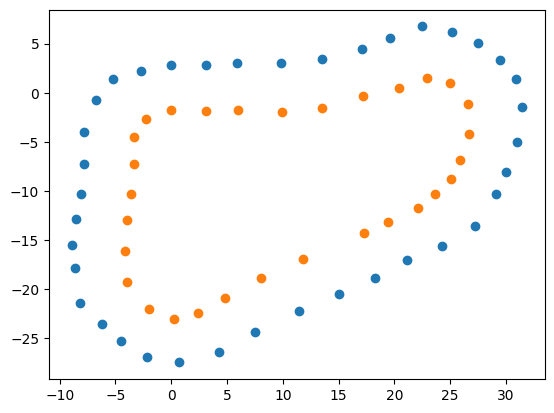

In [1]:
#Setup
import numpy as np
from datascience import minimize
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
right_cones = np.array([[  0.        ,  -1.8       ],
       [  3.08975935,  -1.85526252],
       [  5.98278999,  -1.79658258],
       [  9.93998051,  -1.9238925 ],
       [ 13.51483917,  -1.60300255],
       [ 17.14760971,  -0.37324256],
       [ 20.43093872,   0.49919745],
       [ 22.96524048,   1.5015974 ],
       [ 24.96493912,   0.98349744],
       [ 26.60513878,  -1.17945254],
       [ 26.70603943,  -4.19208241],
       [ 25.87574005,  -6.82074261],
       [ 25.10573959,  -8.79710293],
       [ 23.67623901, -10.29980278],
       [ 22.07293892, -11.73102283],
       [ 19.41926956, -13.14719296],
       [ 17.26255989, -14.24060249],
       [ 11.7874794 , -16.96703339],
       [  8.0200491 , -18.86309242],
       [  4.81850958, -20.85530281],
       [  2.42930937, -22.41230202],
       [  0.23585963, -23.00790215],
       [ -2.03406042, -21.97160339],
       [ -3.93006045, -19.28271294],
       [ -4.1577605 , -16.07309341],
       [ -4.00456047, -12.92978287],
       [ -3.60896045, -10.29980278],
       [ -3.34806043,  -7.24268246],
       [ -3.34576043,  -4.51172256],
       [ -2.21866041,  -2.69177246],])
left_cones = np.array([[  0.        ,   2.8       ],
       [  3.11      ,   2.8       ],
       [  5.93421936,   3.06389737],
       [  9.86850071,   3.01269746],
       [ 13.50389862,   3.4246974 ],
       [ 17.1364994 ,   4.42719746],
       [ 19.62929916,   5.53809738],
       [ 22.49173927,   6.74059725],
       [ 25.13863945,   6.20269728],
       [ 27.52183914,   5.08139753],
       [ 29.5031395 ,   3.33629751],
       [ 30.89194107,   1.40139747],
       [ 31.47583771,  -1.50406253],
       [ 30.99893951,  -5.02318239],
       [ 29.99224091,  -8.05927277],
       [ 29.09803772, -10.29980278],
       [ 27.18214035, -13.53974247],
       [ 24.28283882, -15.56417274],
       [ 21.11373901, -17.04388237],
       [ 18.25337029, -18.83869171],
       [ 15.06159019, -20.45490265],
       [ 11.42059994, -22.26320267],
       [  7.50223923, -24.33030319],
       [  4.25109959, -26.42150307],
       [  0.65132952, -27.45490265],
       [ -2.21166044, -26.94570351],
       [ -4.46276045, -25.22470284],
       [ -6.24296045, -23.57580185],
       [ -8.14336061, -21.38580322],
       [ -8.61766052, -17.86065292],
       [ -8.93846035, -15.45489216],
       [ -8.55606031, -12.85997295],
       [ -8.12086058, -10.29980278],
       [ -7.78436041,  -7.25734234],
       [ -7.84346056,  -4.02889252],
       [ -6.72216034,  -0.73046255],
       [ -5.18666053,   1.4138974 ],
       [ -2.75556044,   2.19019747]])
plt.scatter(left_cones[:, 0], left_cones[:, 1])
plt.scatter(right_cones[:, 0], right_cones[:, 1])
plt.show()

In [2]:
"""Cone Sampling Stuff"""
#Parameters
max_cones_detected = 5 # Controls max number of left cones detected (right cones scale automatically)
max_dropped_cones = 2 # Controls max number of cones to drop from detected set (for some variability)
max_rotational_error = (20) * (np.pi/180) # Controls max amount of rotational error added to detected cones (comverted to radians)
max_translational_error = 0.3 # Controls max_amount of translational noise (or uncertainty in position) of cones (in x and y directions combined)

def sample_detected_cones():
    """Randomly samples a start index for cone arrays, takes out max_cones_detected amount of cones starting from that index,
    and randomly drops up to max_dropped_cones cones from the selected ones. Returns the samples cones, as well as the corresponding
    indices from the original cone lists in which the select cones were take from"""
    left_idx_range = np.random.choice(np.arange(len(left_cones)))
    right_idx_range = round(left_idx_range * (len(right_cones)/len(left_cones)))
    left_original_indices = np.arange(left_idx_range, min(len(left_cones), left_idx_range + max_cones_detected))
    right_original_indices = np.arange(right_idx_range, min(len(right_cones), right_idx_range + round(max_cones_detected * (len(right_cones)/len(left_cones)))))
    left_choices = left_cones[left_original_indices]
    right_choices = right_cones[right_original_indices]
    
    if left_idx_range + max_cones_detected > len(left_cones):
        left_original_indices = np.append(left_original_indices, np.arange((left_idx_range + max_cones_detected) % len(left_cones)))
        left_choices = np.append(left_choices, left_cones[:((left_idx_range + max_cones_detected) % len(left_cones))], axis=0)
        
    if right_idx_range + round(max_cones_detected * (len(right_cones)/len(left_cones))) > len(right_cones):
        right_original_indices = np.append(right_original_indices, np.arange((right_idx_range + round(max_cones_detected * (len(right_cones)/len(left_cones)))) % len(right_cones)))    
        right_choices = np.append(right_choices, right_cones[:((right_idx_range + round(max_cones_detected * (len(right_cones)/len(left_cones)))) % len(right_cones))], axis=0)
        
    kept_indices_left = np.sort(np.random.choice(np.arange(max_cones_detected), max_cones_detected - np.random.choice(np.arange(max_dropped_cones)), replace = False))
    kept_indices_right = np.sort(np.random.choice(np.arange(round(max_cones_detected * (len(right_cones)/len(left_cones)))), round(max_cones_detected * (len(right_cones)/len(left_cones))) - np.random.choice(np.arange(round(max_dropped_cones * len(right_cones) / len(left_cones)))), replace = False))
    
    return left_choices[kept_indices_left], right_choices[kept_indices_right], left_original_indices[kept_indices_left], right_original_indices[kept_indices_right]

def get_origin(left_cones, right_cones):
    return np.array([(left_cones[0][0] + right_cones[0][0]) / 2, (left_cones[0][1] + right_cones[0][1]) / 2])
    
def add_rotational_error(left_cones, right_cones):
    """Add some rotational variance to inputted cones"""
    origin = get_origin(left_cones, right_cones)
    adjusted_left = left_cones - origin
    adjusted_right = right_cones - origin
    angle = np.random.uniform(-max_rotational_error, max_rotational_error)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return (adjusted_left @ rotation_matrix + origin), (adjusted_right @ rotation_matrix + origin) 

def add_translational_error(left_cones, right_cones):
    """Add some translational variance to inputted cones"""
    for x in left_cones:
        cone_noise = np.random.uniform(-max_translational_error, max_translational_error)
        angle = np.random.uniform(0, 2*np.pi)
        x[0] += np.cos(angle) * cone_noise
        x[1] += np.sin(angle) * cone_noise
    for x in right_cones:
        cone_noise = np.random.uniform(-max_translational_error, max_translational_error)
        angle = np.random.uniform(0, 2*np.pi)
        x[0] += np.cos(angle) * cone_noise
        x[1] += np.sin(angle) * cone_noise
    return left_cones, right_cones

def detect_cones():
    """Simulate detecting cones, getting random set and adding all errors. Returns set of noisy cones, and the correct indicies of the cones in the
    original sets of cones"""
    left_sampled, right_sampled, left_idxs, right_idxs = sample_detected_cones()
    left_sampled, right_sampled = add_rotational_error(left_sampled, right_sampled)
    left_sampled, right_sampled = add_translational_error(left_sampled, right_sampled)
    return left_sampled, right_sampled, left_idxs, right_idxs
    

22.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


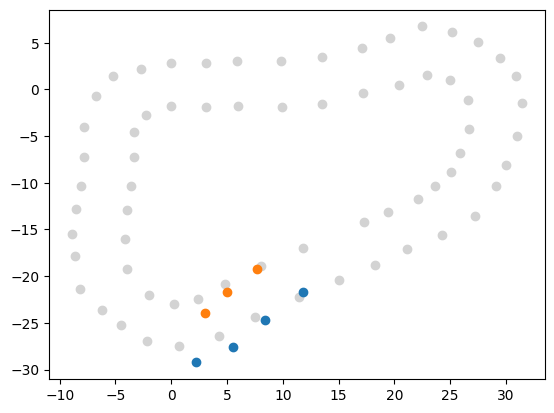

In [6]:
%%timeit -n 1 -r 1
#Sample_cones test
left_sampled, right_sampled, left_idxs, right_idxs = detect_cones()
plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
plt.scatter(left_sampled[:, 0], left_sampled[:, 1])
plt.scatter(right_sampled[:, 0], right_sampled[:, 1])

In [310]:
"""Data Association Approaches"""
#Parameters
max_matching_distance = 3

def distance(a, b):
    return np.sum((a - b) ** 2)

def center_of_mass(left, right):
    total_points = len(left) + len(right)
    if total_points == 0:
        return np.zeros(2)  # or return None, depending on what makes sense

    x = (np.sum(left[:, 0]) + np.sum(right[:, 0])) / total_points
    y = (np.sum(left[:, 1]) + np.sum(right[:, 1])) / total_points
    return np.array([x, y])

def nearest_neighbor(left, right, left_cones, right_cones, allow_duplicates = False, display = False):
    """Returns arrays of indices of cones in global cone array corresponding to those in the passed arguments, in the same order"""
    right_indices = np.full(len(right), -1)
    left_indices = np.full(len(left), -1)

    left_seen = {}
    for i in range(len(left)):
        cone = left[i]
        closest = min(range(len(left_cones)), key=lambda x: distance(left_cones[x], cone))
        if closest not in left_seen and distance(cone, left_cones[closest]) <= max_matching_distance:
            left_indices[i] = closest
            if not allow_duplicates:
                left_seen[closest] = 1
            
    right_seen = {}
    for i in range(len(right)):
        cone = right[i]
        closest = min(range(len(right_cones)), key=lambda x: distance(right_cones[x], cone))
        if closest not in right_seen and distance(cone, right_cones[closest]) <= max_matching_distance:
            right_indices[i] = closest
            if not allow_duplicates:
                right_seen[closest] = 1
    if display:    
        plt.scatter(left[:, 0], left[:, 1], c='pink')
        plt.scatter(right[:, 0], right[:, 1], c='pink')
        plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
        plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
        plt.scatter(left_cones[left_indices[np.where(left_indices != -1)]][:, 0], left_cones[left_indices[np.where(left_indices != -1)]][:, 1])
        plt.scatter(right_cones[right_indices[np.where(right_indices != -1)]][:, 0], right_cones[right_indices[np.where(right_indices != -1)]][:, 1])
    
    return left_indices, right_indices

def nearest_neighbor2(left, right, left_cones, right_cones, allow_duplicates = False, display = False):
    """
    Simulates nearest_neighbor algorithm as it would be defined in the feb integration
    """
    if display:    
        plt.scatter(left[:, 0], left[:, 1], c='pink')
        plt.scatter(right[:, 0], right[:, 1], c='pink')
        plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
        plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
    
    lhat = np.append(left_cones, right_cones, axis=0)
    lhat_color = np.append(np.full(len(left_cones), 0), np.full(len(right_cones), 1))
    z = np.append(left, right, axis=0)
    color = np.append(np.full(len(left), 0), np.full(len(right), 1))
    shuffle = np.random.choice(np.arange(len(lhat)), len(lhat), replace=False)
    lhat = lhat[shuffle]
    lhat_color = lhat_color[shuffle]
    shuffle = np.random.choice(np.arange(len(z)), len(z), replace=False)
    z = z[shuffle]
    color = color[shuffle]
    
    #Setup Stuff (To make accurate to feb integration):
    #lhat -> Random order of all cones (left and right)
    #lhat_color -> Colors of lhat cones (replace with self.color in actual integration)
    #z -> Random order of detected cones (left and right)
    #color -> Colors of z cones (Same as color in actual integration)  
    
    cones = np.empty(0, dtype=int) #Stores cones that found matches
    l_idxs = np.empty(0, dtype=int) #Stores indices of matches in lhat
    for c in np.unique(color):
        z_c = z[np.where(color==c)]
        in_lhat = np.array(np.where(lhat_color==c))[0] #Contains indices of cones in lhat with color c
        
        dists = np.linalg.norm(z_c[:, np.newaxis, :] - lhat[in_lhat], axis=2)
        idxs = np.argmin(dists, axis=1) #Indices of minimum distances to z_c in lhat[np.where(lhat_color==c)]
        dists_at_idxs = dists[np.arange(len(idxs)), idxs] #Distances of cones at given indices to z_c
        
        far_idxs = np.where(dists_at_idxs > max_matching_distance) #Keep only idxs of z_c where distances are valid
        plt.scatter(z_c[far_idxs][:, 0], z_c[far_idxs][:, 1], c='red')
        print(far_idxs)
        in_lhat[far_idxs] = np.full(len(far_idxs), -1)
        #print(in_lhat)
        cones = np.append(cones, z_c)
        l_idxs = np.append(l_idxs, in_lhat[idxs])
        #print(np.where(in_lhat[idxs] == -1))
        #print(l_idxs)
    print(l_idxs)
    print(np.where(l_idxs == -1))
    if display:    
        plt.scatter(lhat[l_idxs[np.where(l_idxs != -1)]][:, 0], lhat[l_idxs[np.where(l_idxs != -1)]][:, 1])
        
    return None

def nn_distance(left, right, left_cones, right_cones, x=0, y=0, rotation=0.0):
    """Returns distance to nearest neighbors"""
    translation = np.array([x, y])
    com = center_of_mass(left, right)
    rotation_matrix = np.array([[np.cos(rotation), -np.sin(rotation)], [np.sin(rotation), np.cos(rotation)]])
    left = (left - com) @ rotation_matrix + com + translation
    right = (right - com) @ rotation_matrix + com + translation
    left_indices, right_indices = nearest_neighbor(left, right, left_cones, right_cones)

    return np.average([distance(left[i], left_cones[left_indices[i]]) for i in range(len(left)) if left_indices[i] > -1] + [distance(right[i], right_cones[right_indices[i]]) for i in range(len(right)) if right_indices[i] > -1]) + max_matching_distance * np.sum(left_indices == -1) +  max_matching_distance * np.sum(right_indices == -1)
    #return np.average([distance(a1, a2) for a1, a2, i in zip(left, left_cones[left_indices], left_indices) if i > -1] + [distance(a1, a2) for a1, a2, i in zip(right, right_cones[right_indices], right_indices) if i > -1])

def built_in_minimize(left, right, left_cones, right_cones, display=False):
    """Use Python's built in minimize function to find optimal rotation and translation"""
    
    x, y, rotation = minimize(lambda x, y, rotate: nn_distance(left, right, left_cones, right_cones, x, y, rotate) * 1000, np.array([0.0, 0.0, 0.0]))
    if display:
        print('Before matching:', nn_distance(left, right, left_cones, right_cones))
        print('After matching:', nn_distance(left, right, left_cones, right_cones, x, y, rotation))
    
    translation = np.array([x, y])
    rotation_matrix = np.array([[np.cos(rotation), -np.sin(rotation)], [np.sin(rotation), np.cos(rotation)]])
    com = center_of_mass(left, right)
    new_left = (left - com) @ rotation_matrix + com + translation
    new_right = (right - com) @ rotation_matrix + com + translation
    if display:    
        plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
        plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
        plt.scatter(new_left[:, 0], new_left[:, 1])
        plt.scatter(new_right[:, 0], new_right[:, 1])

    return nearest_neighbor(new_left, new_right, left_cones, right_cones)

def icp(left, right, left_cones, right_cones, iterations=5, display=False):
    """Returns arrays of indices of cones in global cone array corresponding to those in the passed arguments, in the same order"""
    transform = np.array([0., 0.])
    detected_com = center_of_mass(left, right)
    rotation = 0
    new_left, new_right = left, right
    for i in range(iterations):
        rotation_matrix = np.array([[np.cos(rotation), -np.sin(rotation)], [np.sin(rotation), np.cos(rotation)]])
        new_left = (left - detected_com) @ rotation_matrix + detected_com + transform 
        new_right = (right - detected_com) @ rotation_matrix + detected_com + transform 
        
        left_indices, right_indices = nearest_neighbor(new_left, new_right, left_cones, right_cones, allow_duplicates = True)
        unique_left = np.unique(left_indices)
        unique_right = np.unique(right_indices)
        unique_left = np.delete(unique_left, np.where(unique_left == -1))
        unique_right = np.delete(unique_right, np.where(unique_right == -1))
        
        to_match_com = center_of_mass(left_cones[unique_left], right_cones[unique_right])
        
        transform = to_match_com - detected_com
        rotation = minimize(lambda rot: nn_distance(left, right, left_cones, right_cones, x=transform[0], y=transform[1], rotation=rot) * 1000, 0.0)
        
    rotation_matrix = np.array([[np.cos(rotation), -np.sin(rotation)], [np.sin(rotation), np.cos(rotation)]])
    new_left = (left - detected_com) @ rotation_matrix + detected_com + transform
    new_right = (right - detected_com) @ rotation_matrix + detected_com + transform
    
    if display:
        plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
        plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
        plt.scatter(left[:, 0], left[:, 1], c='pink')
        plt.scatter(right[:, 0], right[:, 1], c='pink')
        plt.scatter(new_left[:, 0], new_left[:, 1])
        plt.scatter(new_right[:, 0], new_right[:, 1])
        
    return nearest_neighbor(new_left, new_right, left_cones, right_cones)

def icp_with_svd(left, right, left_cones, right_cones, iterations=2, display=False):
    transform = np.array([0., 0.])
    detected_com = center_of_mass(left, right)
    rotation = np.array([[1, 0], [0, 1]])

    for i in range(iterations):
        # Find other set of cones using early transform: First transform
        new_left = (left - detected_com) @ rotation + detected_com + transform 
        new_right = (right - detected_com) @ rotation + detected_com + transform 
        left_indices, right_indices = nearest_neighbor(new_left, new_right, left_cones, right_cones, allow_duplicates = False)
        # Find first transform
        detected_com = center_of_mass(left[np.where(left_indices != -1)], right[np.where(right_indices != -1)])
        unique_left = np.delete(left_indices, np.where(left_indices == -1))
        unique_right = np.delete(right_indices, np.where(right_indices == -1))
        to_match_com = center_of_mass(left_cones[unique_left], right_cones[unique_right])
        transform = to_match_com - detected_com
        
        #Find second transform and match of cones + setup of X and Y
        new_left = (left - detected_com) @ rotation + detected_com + transform 
        new_right = (right - detected_com) @ rotation + detected_com + transform
        left_indices, right_indices = nearest_neighbor(new_left, new_right, left_cones, right_cones, allow_duplicates = False)
            
        Y_left = left_cones[left_indices[np.where(left_indices != -1)]]
        Y_right = right_cones[right_indices[np.where(right_indices != -1)]]
        to_match_com = center_of_mass(Y_left, Y_right)
        detected_com = center_of_mass(left[np.where(left_indices != -1)], right[np.where(right_indices != -1)])
        transform = to_match_com - detected_com
        Y_left = Y_left - to_match_com
        Y_right = Y_right - to_match_com
        X_left = (left[np.where(left_indices != -1)] - detected_com)
        X_right = (right[np.where(right_indices != -1)] - detected_com)
        X = np.concatenate((X_left, X_right), axis=0)
        Y = np.concatenate((Y_left, Y_right), axis=0)
        
        #SVD work
        S = X.T @ Y
        U, _, Vt = np.linalg.svd(S)
        rotation = U @ Vt
        if np.linalg.det(rotation) < 0:
            Vt[-1, :] *= -1
            rotation = Vt.T @ U.T
        if display:
            print('Rotation for run', (i + 1), ":", rotation)
            print('Translation for run', (i + 1), ":", transform)

    new_left = (left - detected_com) @ rotation + detected_com + transform
    new_right = (right - detected_com) @ rotation + detected_com + transform
    
    if display:
        plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
        plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
        plt.scatter(left[:, 0], left[:, 1], c='pink')
        plt.scatter(right[:, 0], right[:, 1], c='pink')
        plt.scatter(new_left[:, 0], new_left[:, 1])
        plt.scatter(new_right[:, 0], new_right[:, 1])

    return nearest_neighbor(new_left, new_right, left_cones, right_cones)

(array([3]),)
(array([], dtype=int64),)
[42 19 60 43  1 33 50]
(array([], dtype=int64),)
25.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


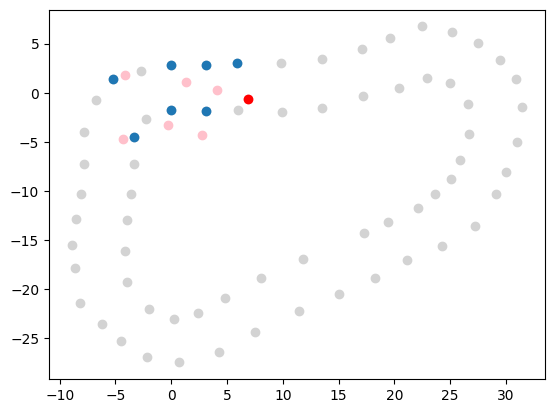

In [317]:
%%timeit -n 1 -r 1
#NN2 approach Test
sample_left, sample_right, real_idxs_left, real_idxs_right = detect_cones()
nearest_neighbor2(sample_left, sample_right, left_cones, right_cones, display = True)

Rotation for run 1 : [[ 0.99370404  0.11203694]
 [-0.11203694  0.99370404]]
Translation for run 1 : [-0.1242284   0.57208808]
Rotation for run 2 : [[ 0.99370404  0.11203694]
 [-0.11203694  0.99370404]]
Translation for run 2 : [-0.1242284   0.57208808]
34.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


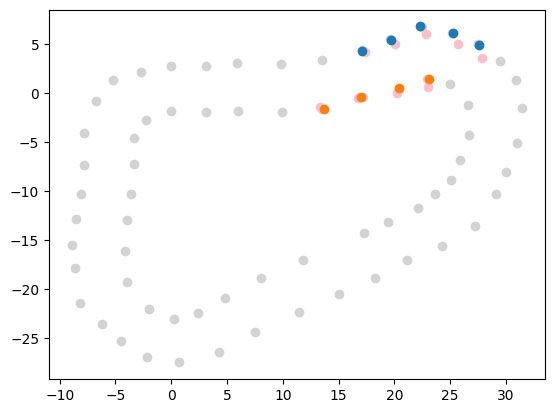

In [105]:
%%timeit -n 1 -r 1
# ICP with SVD Test
sample_left, sample_right, real_idxs_left, real_idxs_right = detect_cones()
icp_with_svd(sample_left, sample_right, left_cones, right_cones, display=True)

569 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


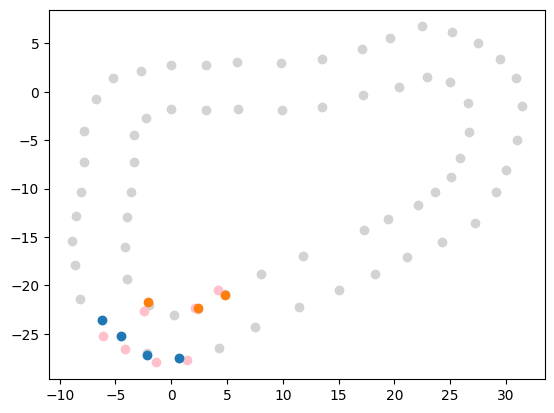

In [158]:
%%timeit -n 1 -r 1
# ICP Test
sample_left, sample_right, real_idxs_left, real_idxs_right = detect_cones()
icp(sample_left, sample_right, left_cones, right_cones, display=True)

Before matching: 12.703756679
After matching: 0.0125084226489
350 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


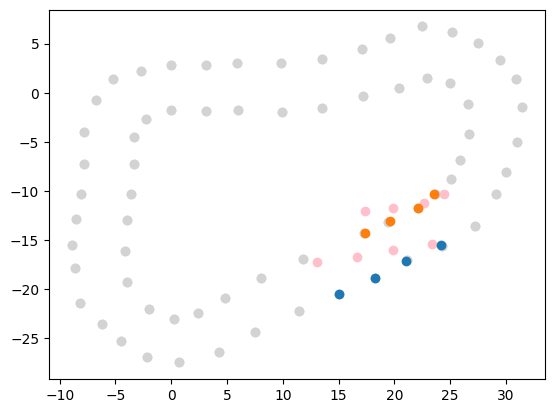

In [17]:
%%timeit -n 1 -r 1
# Brute Force Matching Test
sample_left, sample_right, real_idxs_left, real_idxs_right = detect_cones()
plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
plt.scatter(sample_left[:, 0], sample_left[:, 1], c='pink')
plt.scatter(sample_right[:, 0], sample_right[:, 1], c='pink')
built_in_minimize(sample_left, sample_right, left_cones, right_cones, display=True)
None

23.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


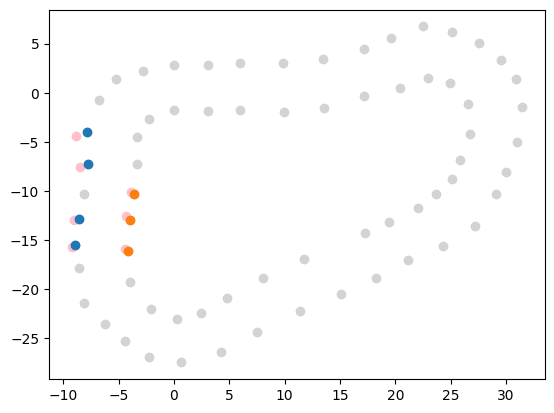

In [98]:
%%timeit -n 1 -r 1
#NN approach Test
sample_left, sample_right, real_idxs_left, real_idxs_right = detect_cones()
a, b = nearest_neighbor(sample_left, sample_right, left_cones, right_cones, display = True)

In [13]:
%%timeit -n 1 -r 1
"""Data Association Approaches Testing"""

def score_approach(approach):
    """Returns Proportion of cones correctly matched by approach"""
    sample_left, sample_right, real_idxs_left, real_idxs_right = detect_cones()
    idxs_left, idxs_right = approach(sample_left, sample_right, left_cones, right_cones)
    score = ((np.count_nonzero(real_idxs_left == idxs_left) + np.count_nonzero(real_idxs_right == idxs_right)) / (len(sample_left) + len(sample_right))).item()
    #if score < 1:
    #    built_in_minimize(sample_left, sample_right, left_cones, right_cones, display=True)
    return score

total = 0
iterations = 1000
for _ in range(iterations):
    total += score_approach(nearest_neighbor)
print('Average proportion of cones correct:', (total / iterations))

"""
Results:

Approach: Nearest Neighbor
Parameters: 
    max_matching_distance = 10
    max_cones_detected = 10
    max_dropped_cones = 4
    max_rotational_error = 10 degrees
    max_translational_error = 0.3
Score: ~ 0.89
Runtime: 100 iterations, 0.384 s

Approach: Brute Force Alignment 
Parameters: 
    max_matching_distance = 10
    max_cones_detected = 10
    max_dropped_cones = 4
    max_rotational_error = 10 degrees
    max_translational_error = 0.3
Score: ~ 0.98
Runtime: 100 iterations, 58.5 s

Approach: ICP
Parameters: 
    max_matching_distance = 10
    max_cones_detected = 10
    max_dropped_cones = 4
    max_rotational_error = 10 degrees
    max_translational_error = 0.3
    icp_iterations = 5
Score: ~ 0.955
Runtime: 100 iterations, 59.6 s

Approach: ICP with SVD
Parameters: 
    max_matching_distance = 3
    max_cones_detected = 10
    max_dropped_cones = 4
    max_rotational_error = 20 degrees
    max_translational_error = 0.3
    icp_iterations = 2
Score: ~ 0.977
Runtime: 1000 iterations, 10.6 s
"""
None

Average proportion of cones correct: 0.79609126984127
2.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
